In [1]:
from IPython.core.debugger import set_trace

%load_ext nb_black

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
movies = pd.read_csv(
    "https://data-bootcamp-ztc.s3.amazonaws.com/movies_complete_cleaned.csv"
)

awards = pd.read_csv(
    "https://data-bootcamp-ztc.s3.amazonaws.com/parsed_awards_table.csv"
)

<IPython.core.display.Javascript object>

In [5]:
movies_sel = movies[["name", "plot"]]

awards_sel = awards[["name", "oscar wins and nominations"]]

awards_sel["oscar_nom"] = [
    1 if x != 0 else 0 for x in awards_sel["oscar wins and nominations"]
]

df = pd.merge(movies_sel, awards_sel, how="left", on="name")

df.set_index("name", inplace=True)

df.drop(["oscar wins and nominations"], axis=1, inplace=True)

df["plot"].fillna("", inplace=True)

df.head()

/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,plot,oscar_nom
name,,
Doctor Strange,"Marvel's ""Doctor Strange"" follows the story of...",1
Sleight,A young street magician (Jacob Latimore) is le...,0
Silence,The story of two Catholic missionaries (Andrew...,1
Manchester by the Sea,"Lee Chandler is a brooding, irritable loner wh...",1
Dirty Grandpa,"Jason Kelly, the grandson of Dick Kelly, loses...",0


<IPython.core.display.Javascript object>

## Exploring the Genre Feature

In [ ]:
# genre and target

movies_with_genre = movies[["name", "genre_kaggle"]]
genres_with_target = pd.merge(movies_with_genre, awards_sel, on="name", how="left")
genres_with_target

In [27]:
oscars_by_genre = genres_with_target.groupby("genre_kaggle")["oscar_nom"].value_counts()
print(oscars_by_genre)

genre_kaggle  oscar_nom
Action        0            1113
              1             130
Adventure     0             301
              1              75
Animation     0             190
              1              76
Biography     0             208
              1             126
Comedy        0            1785
              1             163
Crime         0             385
              1              79
Drama         0             982
              1             255
Family        0              13
              1               1
Fantasy       0              27
              1               2
Horror        0             254
              1               5
Musical       0               2
Mystery       0              36
              1               1
Romance       0              14
Sci-Fi        0              13
Thriller      0              16
War           0               2
Western       0               2
Name: oscar_nom, dtype: int64


<IPython.core.display.Javascript object>

In [39]:
totals_genre = genres_with_target.groupby("genre_kaggle").count()
print(totals_genre)

              name  oscar wins and nominations  oscar_nom
genre_kaggle                                             
Action        1243                        1243       1243
Adventure      376                         376        376
Animation      266                         266        266
Biography      334                         334        334
Comedy        1948                        1948       1948
Crime          464                         464        464
Drama         1237                        1237       1237
Family          14                          14         14
Fantasy         29                          29         29
Horror         259                         259        259
Musical          2                           2          2
Mystery         37                          37         37
Romance         14                          14         14
Sci-Fi          13                          13         13
Thriller        16                          16         16
War           

<IPython.core.display.Javascript object>

In [ ]:
genres = pd.get_dummies(df["genre_kaggle"])  # one hot encoding genres

## Cleaning the text

Remove punctuation

In [4]:
import string


def remove_punct(text):
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)


df["plot"] = [remove_punct(x) for x in df["plot"]]

<IPython.core.display.Javascript object>

Remove stopwords

In [5]:
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))


def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]

    return " ".join(text)


df["plot"] = [remove_stopwords(x) for x in df["plot"]]

<IPython.core.display.Javascript object>

Stemming. Bundling together words of same root.


In [6]:
# from nltk.stem.porter import PorterStemmer

# stemmer = PorterStemmer()


# def stemming(text):
#     text = [stemmer.stem(word) for word in text.split()]

#     return " ".join(text)


# df["plot"] = [stemming(x) for x in df["plot"]]

<IPython.core.display.Javascript object>

#### Tokenization

In [7]:
# from nltk.tokenize import TreebankWordTokenizer

# tokenizer = TreebankWordTokenizer()

# df["tokens"] = df["plot"].map(tokenizer.tokenize)

# df[["plot", "tokens"]].head(10)

<IPython.core.display.Javascript object>

#### TF IDF

Downweighting frequently occuring words in the feature vectors. Frequently occuring words typically don't contain useful information therefore TF - IDF is great for assessing word relevancy.

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(df["plot"])
print(X_train_tfidf.shape)
print(type(X_train_tfidf))

(6256, 34876)
<class 'scipy.sparse.csr.csr_matrix'>


<IPython.core.display.Javascript object>

In [9]:
[x for x in X_train_tfidf.todense()[0][0:].tolist()[0] if x != 0]

[0.13209349307215396,
 0.09998789127898605,
 0.11070723790277437,
 0.15810319302318845,
 0.17283510357018544,
 0.1689601042326595,
 0.1433712824761914,
 0.09541153688976615,
 0.11471980182598308,
 0.09279723157672788,
 0.17283510357018544,
 0.12972954187544986,
 0.18369201477965652,
 0.3274945364572547,
 0.1423343131942321,
 0.09801244673620638,
 0.17757771946663126,
 0.11417480647059823,
 0.18369201477965652,
 0.09776240086050933,
 0.1214881073342098,
 0.18369201477965652,
 0.17283510357018544,
 0.1923096300136283,
 0.13909266163724518,
 0.18369201477965652,
 0.18369201477965652,
 0.057591342797369965,
 0.10358864611097897,
 0.09839311937744659,
 0.09183536362481674,
 0.11047992392536639,
 0.14134559286441048,
 0.07258774667782177,
 0.3197018225154413,
 0.12710229359003125,
 0.1214881073342098,
 0.13338198782564017,
 0.1923096300136283,
 0.15095192842820385,
 0.1111692920629914,
 0.13519132601662598,
 0.0830304903135123]

<IPython.core.display.Javascript object>

### hashing then transform
source: https://stackoverflow.com/questions/54745482/what-is-the-difference-between-tfidf-vectorizer-and-tfidf-transformer

In [10]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

cv = HashingVectorizer()
X_train_counts = cv.fit_transform(df["plot"])
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_counts)
X_train_hashed = tf_transformer.transform(X_train_counts)
print(type(X_train_hashed))
print(X_train_hashed.shape)
print(X_train_hashed)

<class 'scipy.sparse.csr.csr_matrix'>
(6256, 1048576)
  (0, 1019414)	-0.0928251752595355
  (0, 1009665)	-0.18374732926811788
  (0, 995898)	-0.1105131923310971
  (0, 983378)	0.10001800025821993
  (0, 979472)	0.18374732926811788
  (0, 976640)	-0.09804196085722336
  (0, 965118)	-0.14237717379290474
  (0, 877251)	-0.15815080204558757
  (0, 771159)	-0.1776311927802438
  (0, 766433)	-0.17288714875763478
  (0, 764247)	-0.0726096047541288
  (0, 745451)	-0.13913454608952486
  (0, 724631)	-0.15099738401707785
  (0, 720710)	0.31979809312793267
  (0, 703726)	-0.1297686068465417
  (0, 686826)	-0.0954402678085418
  (0, 681351)	0.05760868506273986
  (0, 654798)	0.17288714875763478
  (0, 639749)	-0.13523203567432118
  (0, 628860)	-0.18374732926811788
  (0, 582700)	-0.19236753949229105
  (0, 574181)	0.11074057475871177
  (0, 565760)	0.09842274812899038
  (0, 551567)	0.11475434697026715
  (0, 550563)	-0.16901098255607067
  :	:
  (6255, 458613)	0.09692089807210025
  (6255, 453602)	0.09356124633788845
  (

<IPython.core.display.Javascript object>

Test to see if TfidfVectorizer worked as expected

#### Visualizing the embeddings


In [11]:
X_tfidf = X_train_tfidf
X_hashed = X_train_hashed
y = df["oscar_nom"].values

<IPython.core.display.Javascript object>

Dimensionality reduction using truncated SVD (aka LSA).

This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). 

Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with scipy.sparse matrices efficiently.

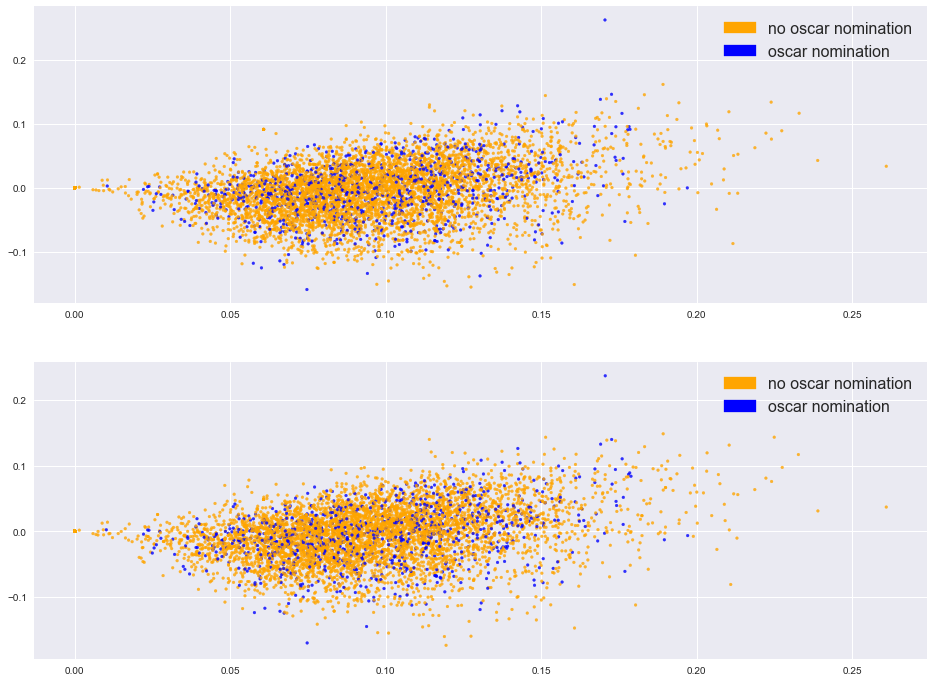

<IPython.core.display.Javascript object>

In [13]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, plot=True):
    lsa = TruncatedSVD(n_components=2)
    lsa.fit(test_data)
    lsa_scores = lsa.transform(test_data)
    color_mapper = {label: idx for idx, label in enumerate(set(test_labels))}
    color_column = [color_mapper[label] for label in test_labels]
    colors = ["orange", "blue", "blue"]
    if plot:
        plt.scatter(
            lsa_scores[:, 0],
            lsa_scores[:, 1],
            s=8,
            alpha=0.8,
            c=test_labels,
            cmap=matplotlib.colors.ListedColormap(colors),
        )
        red_patch = mpatches.Patch(color="orange", label="no oscar nomination")
        green_patch = mpatches.Patch(color="blue", label="oscar nomination")
        plt.legend(handles=[red_patch, green_patch], prop={"size": 16})


plt.figure(1, figsize=(16, 12))
plt.subplot(2, 1, 1)
plot_LSA(X_tfidf, y)
plt.subplot(2, 1, 2)
plot_LSA(X_hashed, y)

TF IDF in this situation has better linearly separable classes.

### Basic Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>

In [23]:
from sklearn.feature_extraction import DictVectorizer

genres = pd.get_dummies(df["genre_kaggle"])  # one hot encoding genres

v = DictVectorizer(sparse=False)
D = genres.to_dict(orient="record")
genres_arr = v.fit_transform(D)
print(genres_arr.shape)
print(type(genres_arr))

(6256, 1048593)
<class 'scipy.sparse.coo.coo_matrix'>


/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/pandas/core/frame.py:1490: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  FutureWarning,


<IPython.core.display.Javascript object>

In [30]:
import numpy as np
from scipy.sparse import csr_matrix

genres_mat = csr_matrix(genres_arr)

from scipy.sparse import coo_matrix, hstack
X_train_hashed_with_genre = hstack([X_train_hashed,genres_mat])


X = X_train_hashed_with_genre
y = df["oscar_nom"].values.reshape(-1, 1)

X_train_tfidf, X_test, y_train_tfidf, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2020
)

model = LogisticRegression(class_weight="balanced")
model.fit(X_train_tfidf, y_train_tfidf)

y_pred = model.predict(X_test)

from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))
metrics.confusion_matrix(y_test, y_pred)


/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1062
           1       0.29      0.44      0.35       190

    accuracy                           0.76      1252
   macro avg       0.59      0.62      0.60      1252
weighted avg       0.80      0.76      0.77      1252



array([[863, 199],
       [107,  83]])

<IPython.core.display.Javascript object>

## Export Model

In [31]:
import joblib

filename = os.path.join(
    "..", "..", "saved_models", "oscar_nomination_logistic_regression.sav"
)
joblib.dump(model, filename)

['../../saved_models/oscar_nomination_logistic_regression.sav']

<IPython.core.display.Javascript object>